# Spacecharge 3d Tree with Cathode Image Charges
---
This example provides an implementation of the ``Plus-Minus-Plus`` technique for forcing GPT to compute the image charge of a bunch near a cathode surface when using the Spacecharge3dTree method for the forces within the bunch.  The technique follows the approach:

1. Compute the spacecharge forces of the bunch and image bunch using the Spacecharge3dmesh routine.
2. Compute the spacecharge forces of the bunch ONLY (no cathode).
3. Compute the spacecharge forces of the bunch ONLY using the Spacecharge3dTree method

The resulting fields are superimposed using the rule: (1) - (2) + (3).

In [1]:
from gpt import GPT
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
G  = GPT('templates/PMP_example/PMP_gpt_ediff.autophased.in', parse_layout=False)

In [3]:
G.set_variable('sct', 6)    # Toggles the PMP method on

True

In [4]:
G.run()

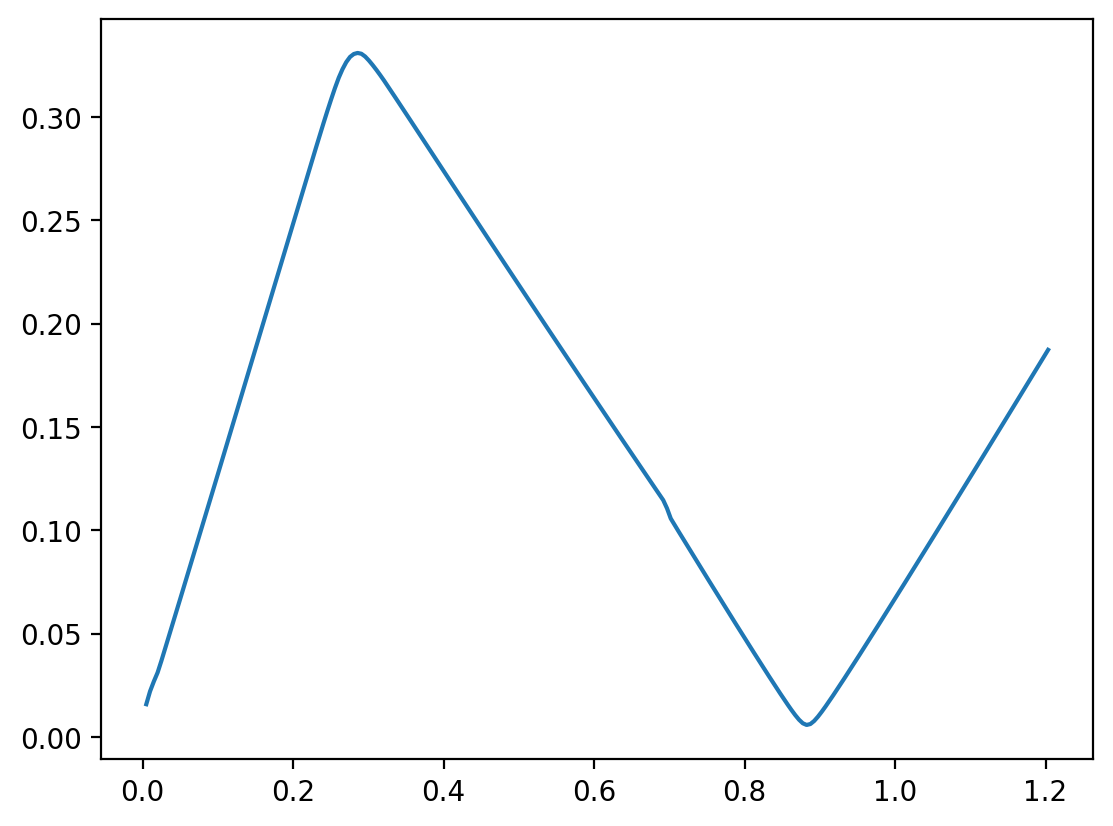

In [5]:
plt.plot(G.screen_stat('mean_z'), G.screen_stat('sigma_x')*1e3);

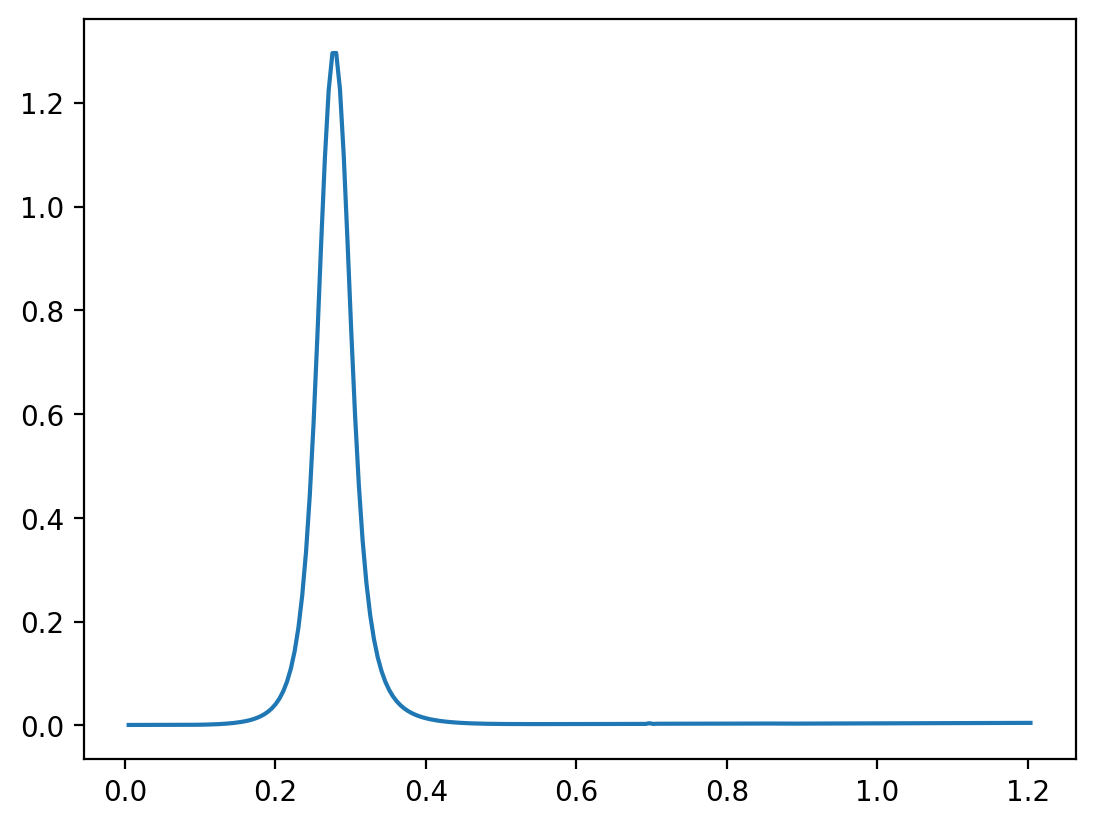

In [6]:
plt.plot(G.screen_stat('mean_z'), G.screen_stat('norm_emit_x')*1e6);

In [7]:
G2  = GPT('templates/PMP_example/PMP_gpt_ediff.autophased.in', parse_layout=False)

In [8]:
G2.set_variable('sct', 1)

True

In [9]:
G2.run()

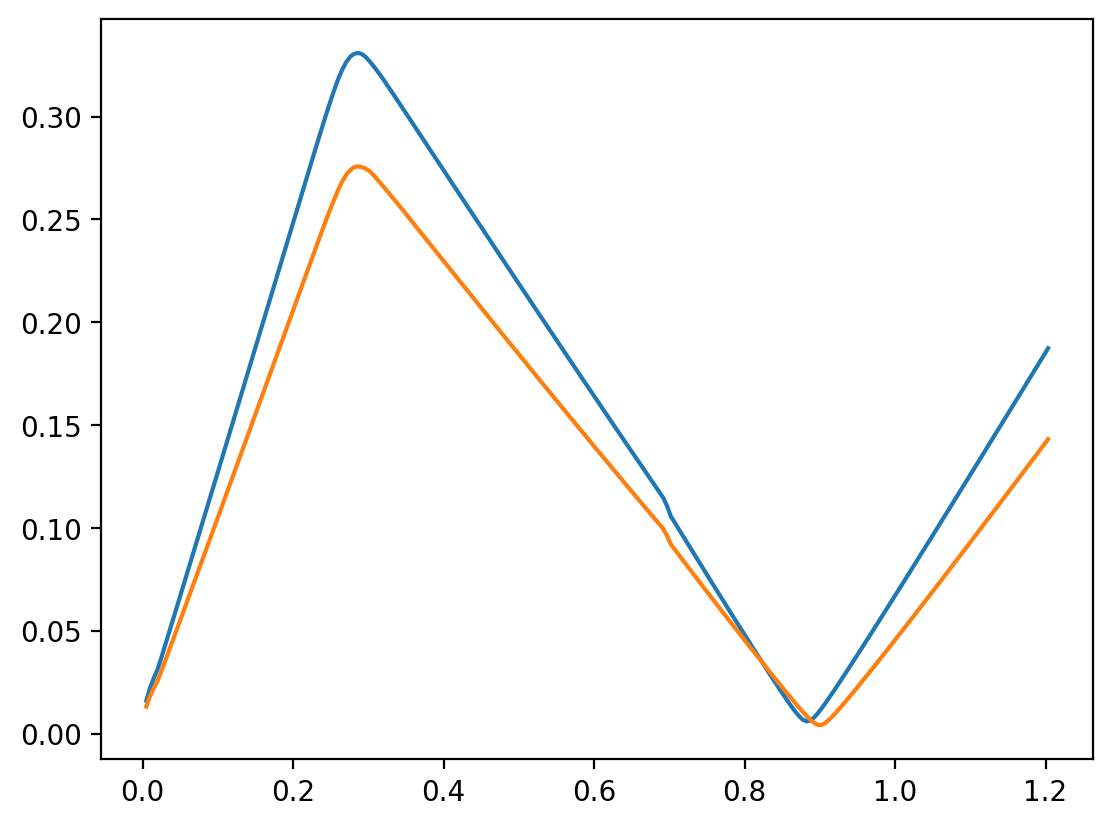

In [10]:
plt.plot(G.screen_stat('mean_z'), G.screen_stat('sigma_x')*1e3);
plt.plot(G2.screen_stat('mean_z'), G2.screen_stat('sigma_x')*1e3);

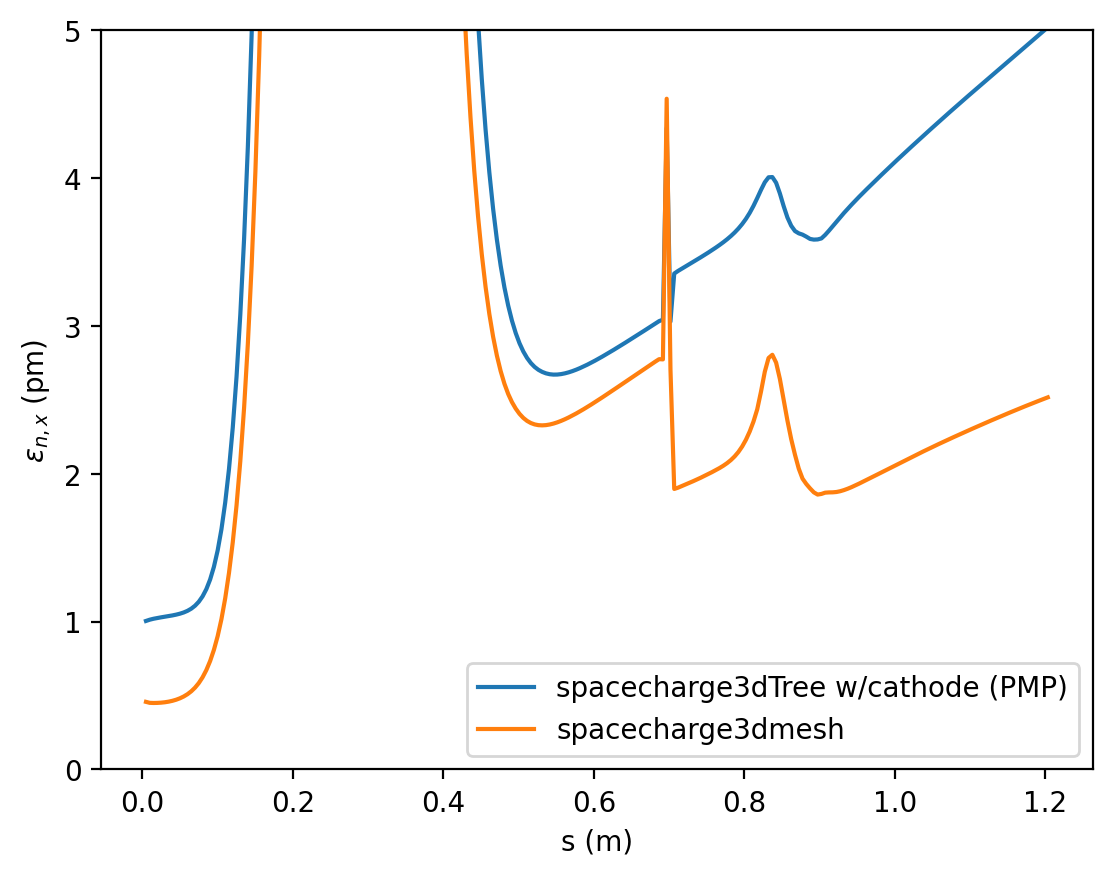

In [11]:
plt.plot(G.screen_stat('mean_z'), G.screen_stat('norm_emit_x')*1e9);
plt.plot(G2.screen_stat('mean_z'), G2.screen_stat('norm_emit_x')*1e9);
plt.ylim([0, 5])
plt.xlabel('s (m)')
plt.ylabel(r'$\epsilon_{n,x}$ (pm)');

plt.legend(['spacecharge3dTree w/cathode (PMP)', 'spacecharge3dmesh']);